<a href="https://colab.research.google.com/github/lerlerchan/BaziEval/blob/master/chapter12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 12 - Principal Components Analysis with scikit-learn

This notebook contains code accompanying Chapter 12 Principal Components Analysis with scikit-learn in *Practical Discrete Mathematics* by Ryan T. White and Archana Tikayat Ray.

## Eigenvalues and eigenvectors, orthogonal bases

### Example: Pizza nutrition

In [ ]:
import pandas as pd
dataset = pd.read_csv('pizza.csv')
dataset.head()

,brand,moisture,protein,fat,ash,sodium,carbohydrates,calories
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67


# create a correration matrix plot based on the dataset


Correlation Matrix:
               moisture   protein       fat       ash    sodium  \
moisture       1.000000  0.360248 -0.171318  0.265556 -0.102279   
protein        0.360248  1.000000  0.498002  0.823844  0.429130   
fat           -0.171318  0.498002  1.000000  0.791634  0.933325   
ash            0.265556  0.823844  0.791634  1.000000  0.808122   
sodium        -0.102279  0.429130  0.933325  0.808122  1.000000   
carbohydrates -0.591802 -0.853542 -0.640238 -0.898988 -0.620176   
calories      -0.764441  0.070258  0.764567  0.326468  0.671958   

               carbohydrates  calories  
moisture           -0.591802 -0.764441  
protein            -0.853542  0.070258  
fat                -0.640238  0.764567  
ash                -0.898988  0.326468  
sodium             -0.620176  0.671958  
carbohydrates       1.000000 -0.023485  
calories           -0.023485  1.000000  


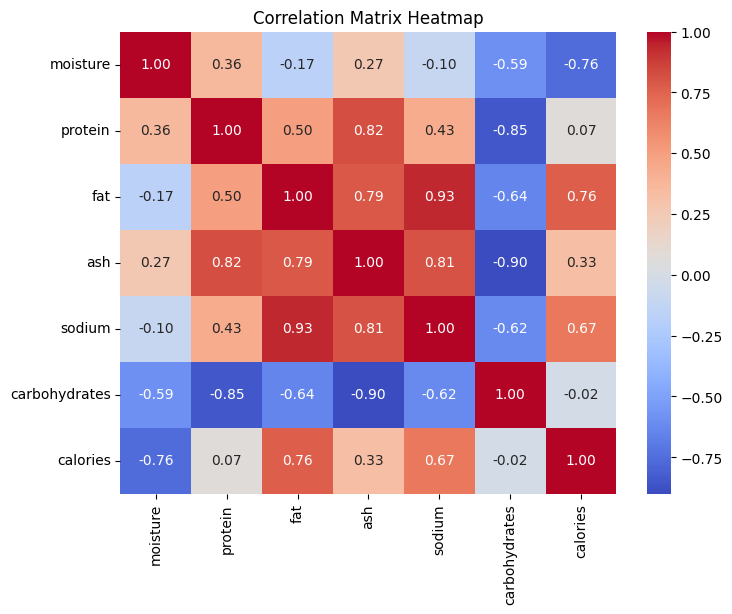

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Step 3: Compute the Correlation Matrix
# Exclude non-numeric columns (if any) before computing the correlation
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_dataset.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


### Example: Computing eigenvalues and eigenvectors

In [ ]:
import numpy as np
A = np.array([[3,1], [1,3]])
l, v = np.linalg.eig(A)
print("The eigenvalues are:\n ",l)
print("The eigenvectors are:\n ", v)

The eigenvalues are:
  [4. 2.]
The eigenvectors are:
  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## The scikit-learn implementation of PCA

We will start by importing the dataset and then dropping the brand column from it. This is done to make sure that all our feature variables are numbers and hence can be scaled/normalized. We will then create another variable called target which will contain the names of the brands of pizzas.

In [ ]:
import pandas as pd
dataset = pd.read_csv('pizza.csv')
#Dropping the brand name column before standardizing the data
df_num = dataset.drop(["brand"], axis=1)

# Setting the brand name column as the target  variable
target = dataset['brand']

Now that we have the dataset in order, we will then normalize the columns of the dataset to make sure that the mean for a variable is 0 and the variance is 1 and then we will run PCA on the dataset.

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num)
scaled_data = scaler.transform(df_num)

#Applying PCA to the scaled data
from sklearn.decomposition import PCA

#Reducing the dimesions to 2 components so that we can have a 2D visualization
pca = PCA(n_components = 2)
pca.fit(scaled_data)

#Applying to our scaled dataset
scaled_data_pca = pca.transform(scaled_data)

#Check the shape of the original dataset and the new dataset
print("The dimensions of the original dataset is: ", scaled_data.shape)
print("The dimensions of the dataset after performing PCA is: ", scaled_data_pca.shape)

The dimensions of the original dataset is:  (300, 7)
The dimensions of the dataset after performing PCA is:  (300, 2)


Now we have reduced our 7-dimensional dataset to its 2 principal components as can be seen from the dimensions shown above. We will move forward with plotting the principal components to check whether 2 principal components were enough to capture the variability in the dataset – the different nutritional content of pizzas produced by different companies.

C:\Users\Ryan\anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


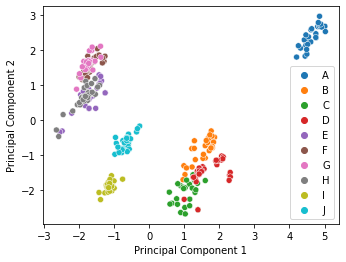

In [ ]:
#Plotting the principal components
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(scaled_data_pca[:,0], scaled_data_pca[:,1], target)
plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Now, we will move on to perform PCA in a way where we do not choose the number of desired principal components, rather we choose the number of principal components that add up to a certain desired variance. The Python implementation of this is very similar to the previous way with very slight changes to the code as shown below.

In [ ]:
import pandas as pd

dataset = pd.read_csv('pizza.csv')

#Dropping the brand name column before standardizing the data
df_num = dataset.drop(["brand"], axis=1)

# Setting the brand name column as the target  variable
target = dataset['brand']

#Scaling the data (Step 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num)
scaled_data = scaler.transform(df_num)

#Applying PCA to the scaled data
from sklearn.decomposition import PCA

#Setting the variance to 0.95
pca = PCA(n_components = 0.95)
pca.fit(scaled_data)

#Applying to our scaled dataset
scaled_data_pca = pca.transform(scaled_data)

#Check the shape of the original dataset and the new dataset
print("The dimensions of the original dataset are: ", scaled_data.shape)
print("The dimensions of the dataset after performing PCA is: ", scaled_data_pca.shape)

The dimensions of the original dataset are:  (300, 7)
The dimensions of the dataset after performing PCA is:  (300, 3)


As we can see from the above output, 3 principal components are required to capture 95% of the variance in the dataset. This means that by choosing 2 principal directions previously, we were capturing < 95% of the variance in the dataset. Despite capturing < 95% of the variance, we were able to visualize the fact that the pizzas produced by different companies have different nutritional contents.

# Create a 3D PCA plot for the scaled dimenstion dataset of (300, 3)

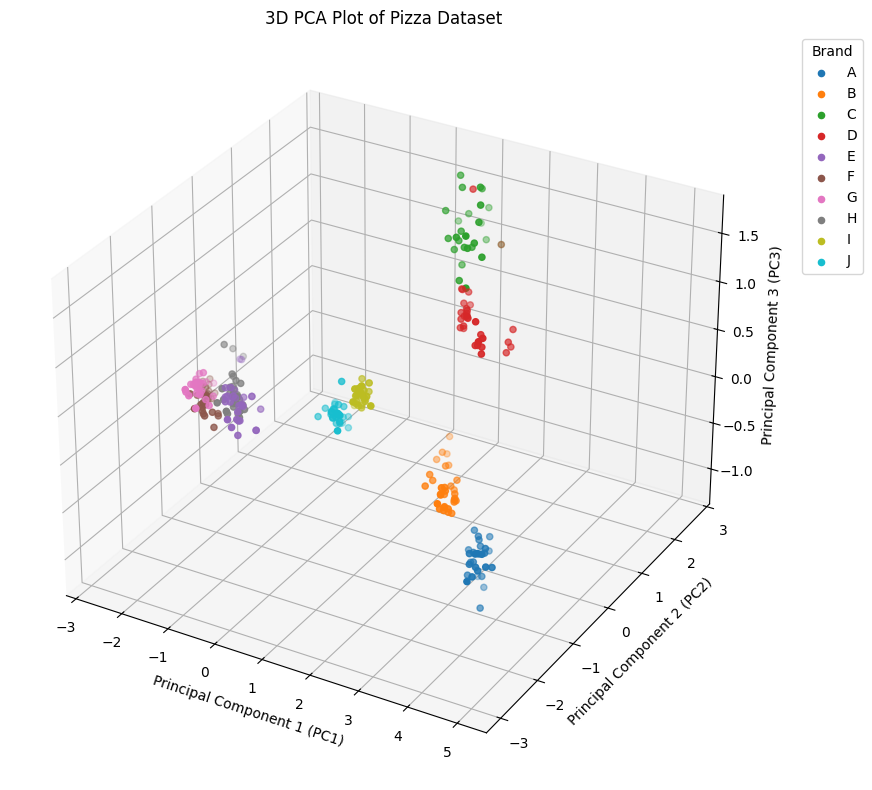

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the first three principal components for the 3D plot
x = scaled_data_pca[:, 0]  # PC1
y = scaled_data_pca[:, 1]  # PC2
z = scaled_data_pca[:, 2]  # PC3

# Color the points based on the brand (target)
unique_brands = target.unique()
colors = plt.cm.tab10(range(len(unique_brands)))  # Use a color map for brands

# Plot each brand with a different color
for i, brand in enumerate(unique_brands):
    ax.scatter(
        x[target == brand],  # PC1 for this brand
        y[target == brand],  # PC2 for this brand
        z[target == brand],  # PC3 for this brand
        color=colors[i],     # Assign a unique color
        label=brand          # Add the brand name to the legend
    )

# Add labels and title
ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')
ax.set_zlabel('Principal Component 3 (PC3)')
ax.set_title('3D PCA Plot of Pizza Dataset')

# Add a legend
ax.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


## An application to real-world data

The first step is to import the data as shown below. It is going to take some time since it is a big dataset, hence hang tight. The dataset contains images of 70000 digits (0-9) where each image has 784 features.

In [ ]:
#Importing the dataset
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version = 1)

# Choosing the independent (X) and dependent variables (y)
X,y = mnist_data["data"], mnist_data["target"]

Now that we have the dataset imported, we will move on to visualize the image of a digit to get familiar with the dataset. For visualization, we will use the `matplotlib` library. We will visualize the 50000th digit image. Feel free to check out other digit images of your choice – make sure to use an index between 0 and 69999. We will set colormap to "binary" to output a grayscale image.

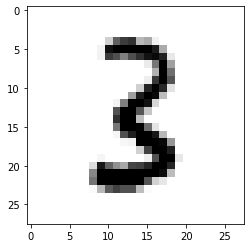

In [ ]:
#Plotting one of the digits
import matplotlib.pyplot as plt
plt.figure(1)
#Plotting the 50000th digit
digit = X[50000]
#Reshaping the 784 features into a 28x28 matrix
digit_image = digit.reshape(28,28)

plt.imshow(digit_image, cmap='binary')
plt.show()

Next, we will apply PCA to this dataset to reduce its dimension from $28*28=784$ to a lower number. We will plot the proportion of the variation that is reflected by PCA-reduced dimensional data of different dimensions.

(70000, 784)


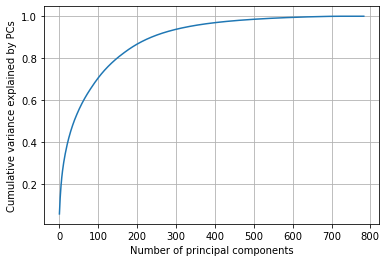

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaled_mnist_data = StandardScaler().fit_transform(X)
print(scaled_mnist_data.shape)

#Applying PCA to ur dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=784)
mnist_data_pca = pca.fit_transform(scaled_mnist_data)

#Calculating cumulative variance captured by PCs
import numpy as np
variance_percentage = pca.explained_variance_/np.sum(pca.explained_variance_)

#Calculating cumulative variance
cumulative_variance = np.cumsum(variance_percentage)

#Plotting cumalative variance
import matplotlib.pyplot as plt
plt.figure(2)
plt.plot(cumulative_variance)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained by PCs')
plt.grid()
plt.show()